### Importing Necessaries and Getting the parameters for distributions from the Data

#--------- Gamma parameters for G1 and G2 (control) ----------#

 G1: 
 shape parameter:  9.084965625769376 and scale parameter is:  1.9177922780089132

 G2: 
 shape parameter:  15.753604883780861 and scale parameter is:  1.2695506931617295

 

#--------- Gamma parameters for G1 and G2 (lopatinib) ----------#

 G1: 
 shape parameter:  1.9057101245622508 and scale parameter is:  12.184434400973615

 G2: 
 shape parameter:  1.3088417134148769 and scale parameter is:  25.07560667085548


Text(0.5, 1.0, 'histogram of G2 distribution')

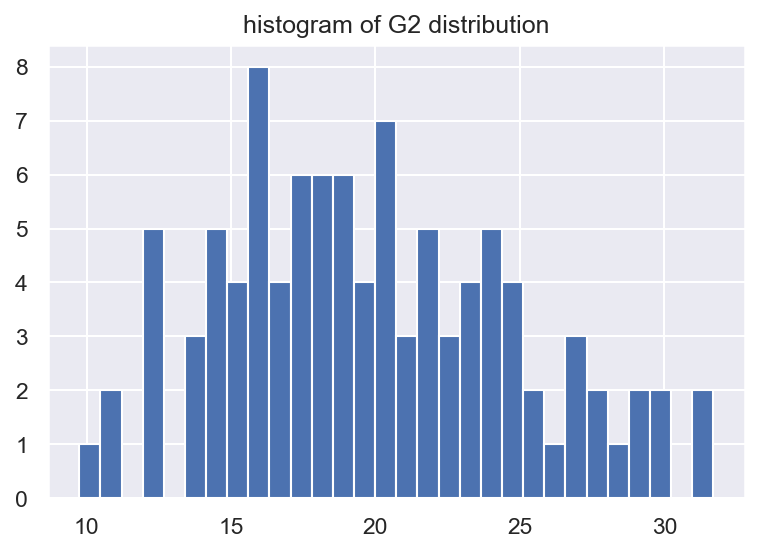

In [3]:
## importing the functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as ss; ss.set()

from model.cell import CellNode
from model.cell_utils import generateLineageWithTime, separate_pop, inG1_or_G2
from model.parameter_estimate import GAnalytical

## Reading the data
df = pd.read_excel(r'./data/single_cellData.xlsx')
##----------------------- Preprocessing the data ------------------------##

# dataFrmae into numpy array
a = df.values

G1 = a[:, 0] # G1 for control
G2 = a[:, 1] # G2 for control

G1_lap = a[:, 3] # G1 for lapatinib
G2_lap = a[:, 4] # G2 for lapatinib



# removing nan from the array
G2 = G2[~np.isnan(G2)]
G1 = G1[~np.isnan(G1)]

G2_lap = G2_lap[~np.isnan(G2_lap)]
G1_lap = G1_lap[~np.isnan(G1_lap)]

# converting from unit of [frames] into [hours]
# every frame is every 30 minutes, so dividing the numbers by 2 gives unit of [hours]
G1 = G1/2
G2 = G2/2

G1_lap = G1_lap/2
G2_lap = G2_lap/2

## Calculating the parameters of Gamma distributions (control)
g1_a, g1_b = GAnalytical(G1)
g2_a, g2_b = GAnalytical(G2)
print('#--------- Gamma parameters for G1 and G2 (control) ----------#')
print('\n G1: \n shape parameter: ', g1_a, 'and scale parameter is: ', g1_b)
print('\n G2: \n shape parameter: ', g2_a, 'and scale parameter is: ', g2_b)
print('\n \n')

## Calculating the parameters of Gamma distributions (lopatinib)
g1_a_lap, g1_b_lap = GAnalytical(G1_lap)
g2_a_lap, g2_b_lap = GAnalytical(G2_lap)
print('#--------- Gamma parameters for G1 and G2 (lopatinib) ----------#')
print('\n G1: \n shape parameter: ', g1_a_lap, 'and scale parameter is: ', g1_b_lap)
print('\n G2: \n shape parameter: ', g2_a_lap, 'and scale parameter is: ', g2_b_lap)

gm = np.random.gamma(g2_a,g2_b, 100)
gm_lap = np.random.gamma(g2_a_lap, g2_b_lap, 100)
plt.figure(dpi = 150)
plt.hist(gm, bins = 30)
plt.title("histogram of G2 distribution")


### Generating the cell population based on the parameters and visualizing the number of cells in G1, G2, and in total.

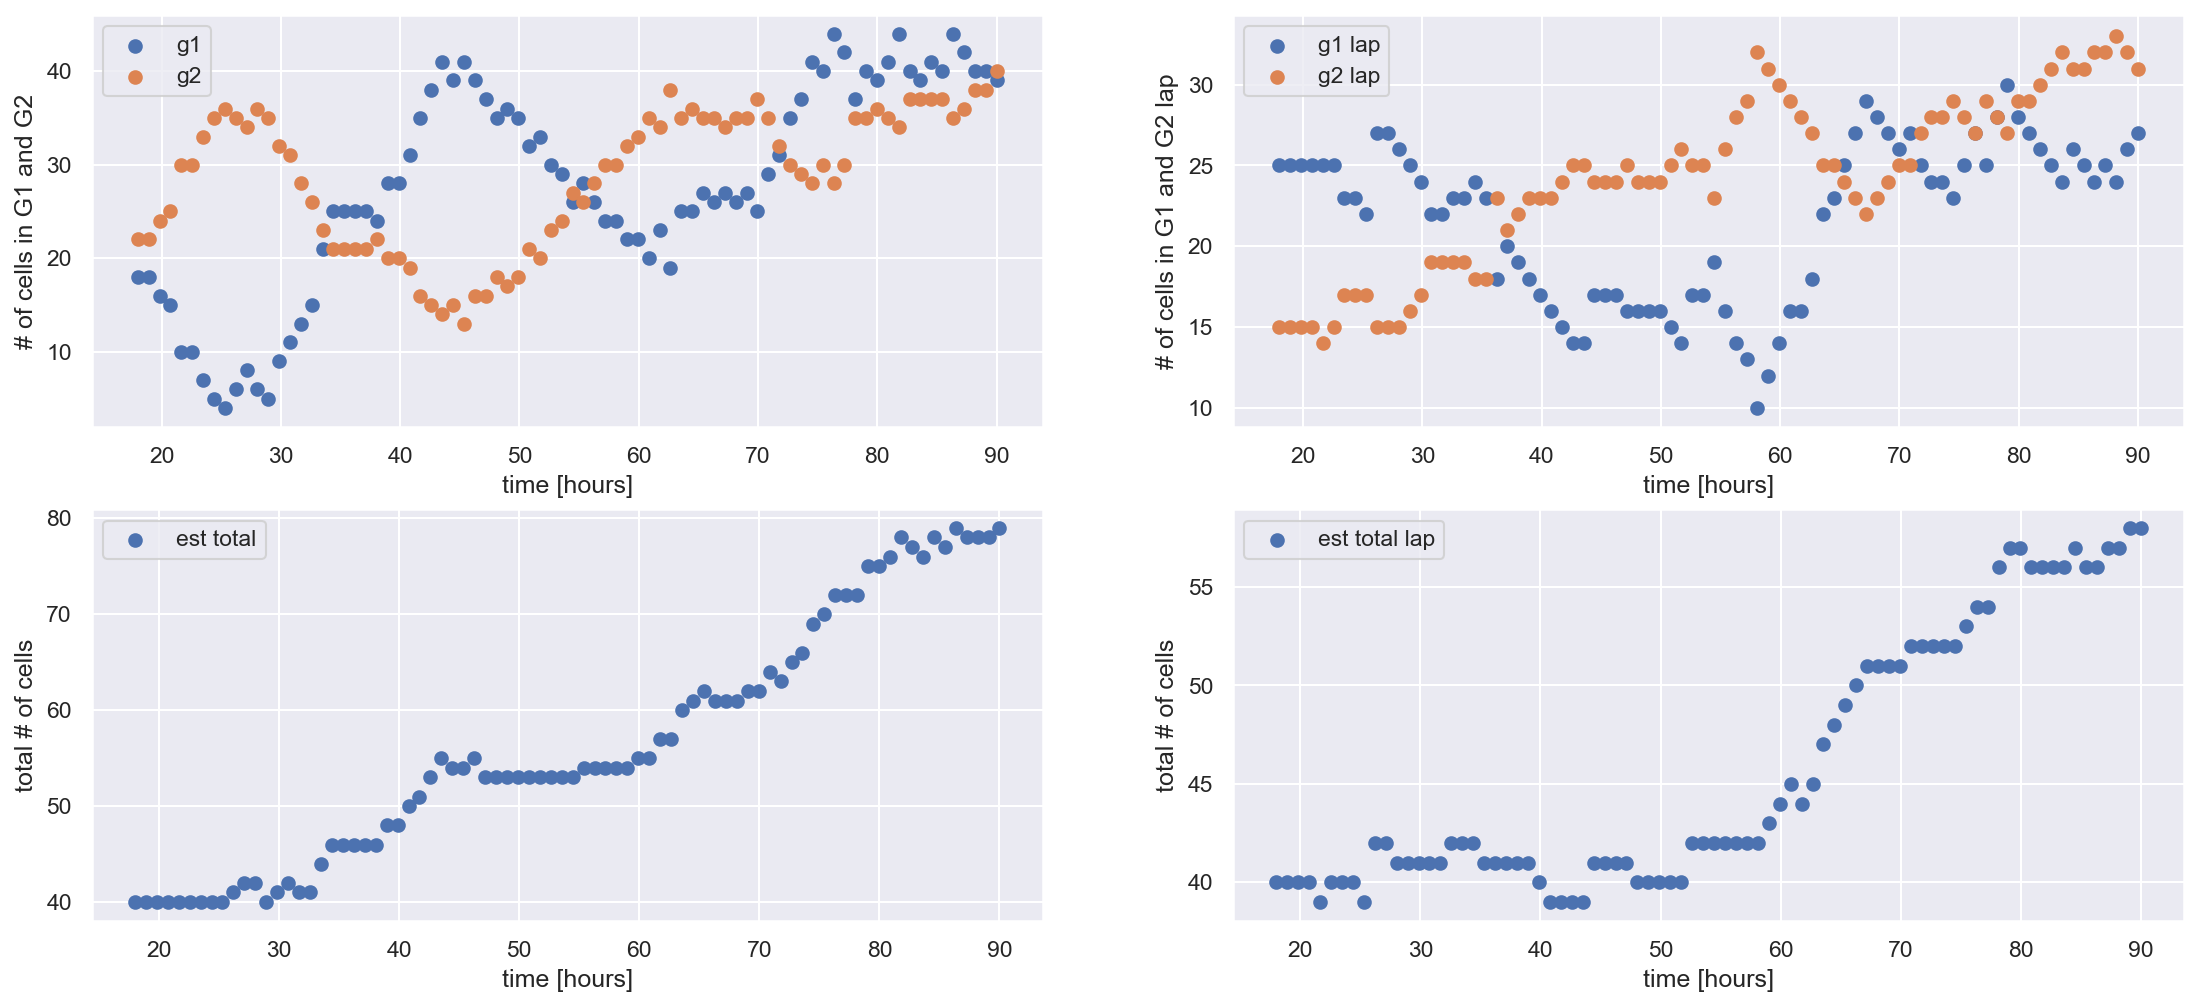

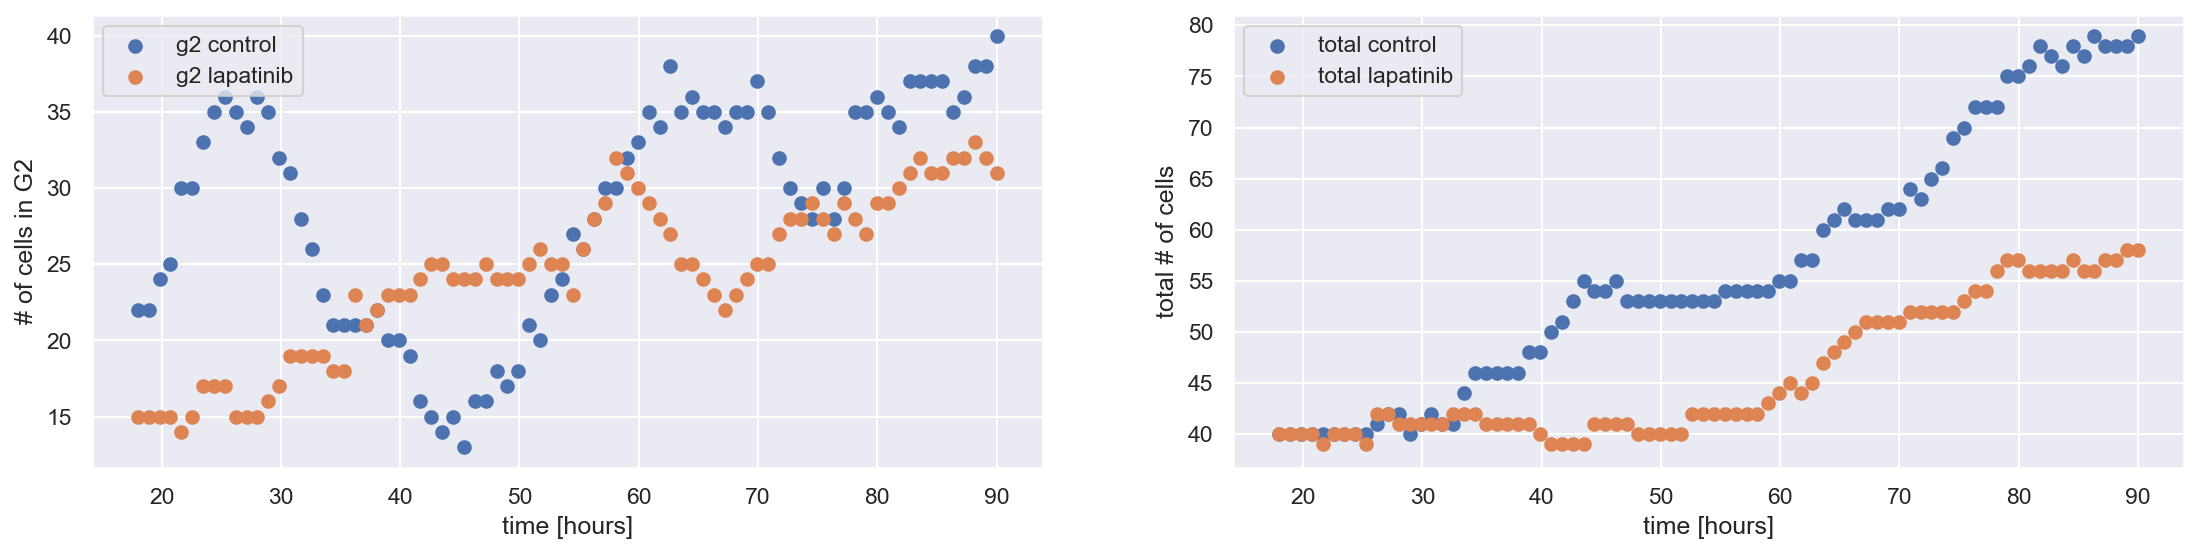

In [4]:
initCells = 40
experimentTime = 90
locBern1 = 0.75
locBern2 = 0.75

# creating the lineage (control)
lin_control = generateLineageWithTime(initCells, experimentTime, locBern1, g1_a, g1_b, g2_a, g2_b)

# creating the lineage (lopatinib)
lin_lapatinib = generateLineageWithTime(initCells, experimentTime, locBern2, g1_a_lap, g1_b_lap, g2_a_lap, g2_b_lap)

# set the number of lineages as the number of intial cells we start with
num_of_lins = initCells

# separating the population in terms of their root parent
pop_control = separate_pop(num_of_lins, lin_control)
pop_lapatinib = separate_pop(num_of_lins, lin_lapatinib)

time = np.linspace(18, 90, 80)

# Determining the number of cells in G1 or G2 phase for every time point
num_g1, num_g2, num_cell = inG1_or_G2(lin_control, time)   
num_g1_lap, num_g2_lap, num_cell_lap = inG1_or_G2(lin_lapatinib, time) 

# Plotting the # of cells in G1, G2, and totall # of cells
plt.figure(figsize = (18,8), dpi = 150)
plt.subplot(2,2,1)
plt.scatter(time, num_g1, label = 'g1')
plt.scatter(time, num_g2, label = 'g2')
plt.ylabel('# of cells in G1 and G2')
plt.xlabel('time [hours]')
plt.legend()
plt.subplot(2,2,2)
plt.scatter(time, num_g1_lap, label = 'g1 lap')
plt.scatter(time, num_g2_lap, label = 'g2 lap')
plt.ylabel('# of cells in G1 and G2 lap')
plt.xlabel('time [hours]')
plt.legend()
plt.subplot(2,2,3)
plt.scatter(time, num_cell, label = 'est total')
plt.ylabel('total # of cells')
plt.xlabel('time [hours]')
plt.legend()
plt.subplot(2,2,4)
plt.scatter(time, num_cell_lap, label = 'est total lap')
plt.ylabel('total # of cells')
plt.xlabel('time [hours]')
plt.legend()
# plt.savefig('g1g2.png')
plt.show()

plt.figure(figsize = (18,4), dpi = 150)
plt.subplot(1,2,1)
# plt.scatter(time, num_g1, label = 'g1')
plt.scatter(time, num_g2, label = 'g2 control')
# plt.scatter(time, num_g1_lop, label = 'g1 lapatinib')
plt.scatter(time, num_g2_lap, label = 'g2 lapatinib')
plt.ylabel('# of cells in G2')
plt.xlabel('time [hours]')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(time, num_cell, label = 'total control')
plt.scatter(time, num_cell_lap, label = 'total lapatinib')
plt.ylabel('total # of cells')
plt.xlabel('time [hours]')
plt.legend()
# plt.savefig('1.png')
plt.show()
